# Analyzing Metric resistance to Random and Brute Force models

In this experiment, we compared the performance of Gemma, a brute force model, and a random model. The random model was tasked with extracting sentences at random from the transcript, while the brute force model considered every possible sentence from the transcript. The results, as illustrated in the graph, reveal that the brute force model suffers from significant negative impacts due to excessive generation of responses, which adversely affects its performance. In contrast, Gemma achieved the highest scores for the transcripts of two comedians, exceeding 60%.

#### Imports

In [1]:
import sys
import pandas as pd
sys.path.append("..")
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt
import seaborn as sns

from humor.bipartite_metric import bipartite_metric

In [2]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
model = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
transcript = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_transcripts.csv')
random_model = pd.read_csv("/home/ada/humor/data/stand_up_dataset/random_gemma_quotes.csv")

In [3]:
# Create brute force dataframe
brute_sentences = []
for i in range(len(transcript['comedian'])):
    comedian = transcript['comedian'][i]
    trans = transcript['transcript'][i]
    sentences = nltk.sent_tokenize(trans)
    for sentence in sentences:
        brute_sentences.append({'comedian': comedian, 'sentence': sentence})

brute_model = pd.DataFrame(brute_sentences)

#### Experiment

In [4]:
brute = bipartite_metric(brute_model, ground_truth)
print("Brute Model:", brute.select_dtypes(include='number').mean())

gemma_metric = bipartite_metric(model, ground_truth)
print("Gemma Model:", gemma_metric.select_dtypes(include='number').mean())

random = bipartite_metric(random_model, ground_truth)
print("Random Model:", random.select_dtypes(include='number').mean())

Brute Model: score    0.0
dtype: float64
Gemma Model: score    30.08505
dtype: float64
Random Model: score    31.694811
dtype: float64


<Figure size 500x500 with 0 Axes>

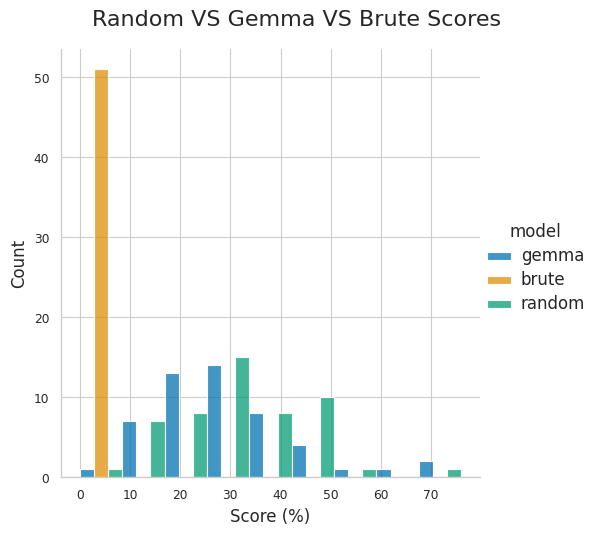

In [6]:
gemma = gemma_metric.assign(model="gemma") 
brute = brute.assign(model="brute") 
random = random.assign(model="random") 
df = pd.concat([gemma, brute, random]).reset_index(drop=True)

sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(5, 5))  
sns.set_palette("colorblind")

plot = sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plot.fig.suptitle("Random VS Gemma VS Brute Scores", fontsize=16, y=1.05)
plot.set_axis_labels("Score (%)", "Count", fontsize=12)

plot._legend.get_title().set_fontsize(12) 
for text in plot._legend.texts:
    text.set_fontsize(12) 

plt.show()